In [76]:
from numpy import expand_dims
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,MaxPool2D,BatchNormalization,Activation,Conv2D,Input,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.metrics import categorical_accuracy,binary_accuracy
from tensorflow.keras.optimizers import SGD
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array

# Image Data Generator

In [98]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                             rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2,
                             fill_mode='nearest')

In [99]:
traindata = datagen.flow_from_directory(r'C:\Users\sarav\Desktop\CNN\Cat vs Dog\train')

Found 23035 images belonging to 2 classes.


In [100]:
testdata = datagen.flow_from_directory(r'C:\Users\sarav\Desktop\CNN\Cat vs Dog\test')

Found 9 images belonging to 2 classes.


In [101]:
traindata.classes

array([0, 0, 0, ..., 1, 1, 1])

In [102]:
traindata.image_shape

(256, 256, 3)

In [104]:
testdata.image_shape

(256, 256, 3)

In [105]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(traindata,steps_per_epoch=len(traindata),validation_data=testdata, validation_steps=len(testdata), epochs=2, verbose=0)

In [107]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 131072)           

In [108]:
# evaluate model
_, acc = model.evaluate(testdata, steps=len(testdata), verbose=0)
print('> %.3f' % (acc * 100.0))

> 50.000


# Image data augmentation

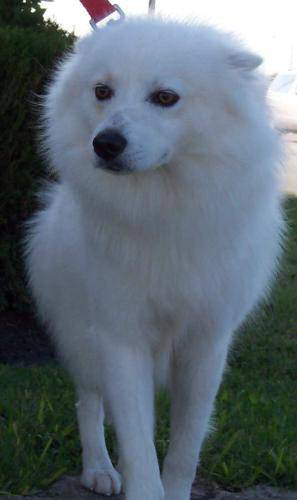

In [86]:
img= load_img(r'C:\Users\sarav\Desktop\CNN\Cat vs Dog\train\Dog\dog.31.jpg')
img

# Horizontal and Vertical Shift Augmentation

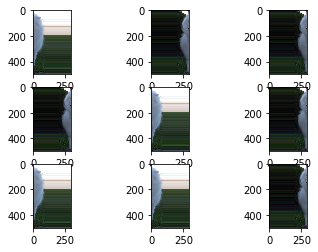

In [87]:
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

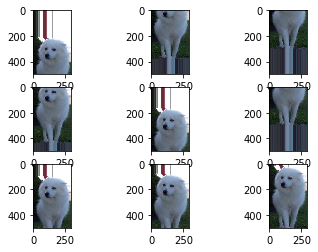

In [90]:
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

# Horizontal and Vertical Flip Augmentation

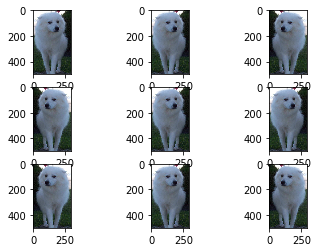

In [91]:
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

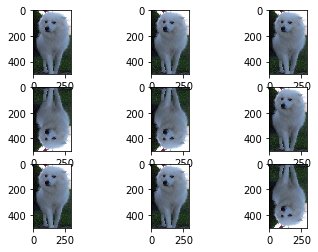

In [92]:
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

# Random Rotation Augmentation

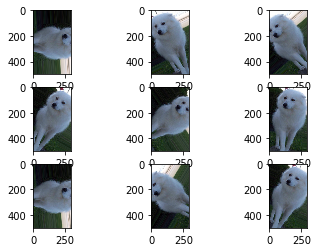

In [93]:
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

# Random Brightness Augmentation

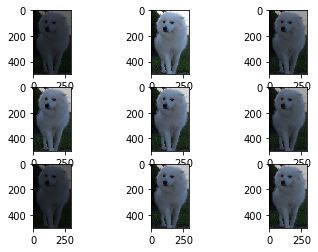

In [95]:
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

# Random Zoom Augmentation

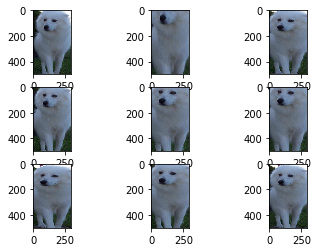

In [97]:
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()